# Lab 6

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import numpy.random as rnd
import pandas as pd


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## Confidence intervals
For this week we will be using the real data you are working on, but more as a background for the main activity rather than in depth explorations. Don't worry, more in-depth exploration the next two weeks!

### Setup
First, we want to have some \`background' data (presumably signal free) onto which we can inject a simulated signal. So the first step is to isolate some appropriate data from your data files. 

LHC

For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

In [2]:
bkgd = stats.poisson(100).rvs(size=1000000)

## Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

In [3]:
fsprob = 1/3.5e6
threshold = stats.poisson(100).isf(fsprob)
threshold

154.0

In [4]:
one_sig = (threshold-100)/5
eight_sig = 100 + 8*one_sig
thirty_sig = 100 + 30*one_sig
twentytwo_sig = 100 + 22*one_sig
twentytwo_sig

337.6

## Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

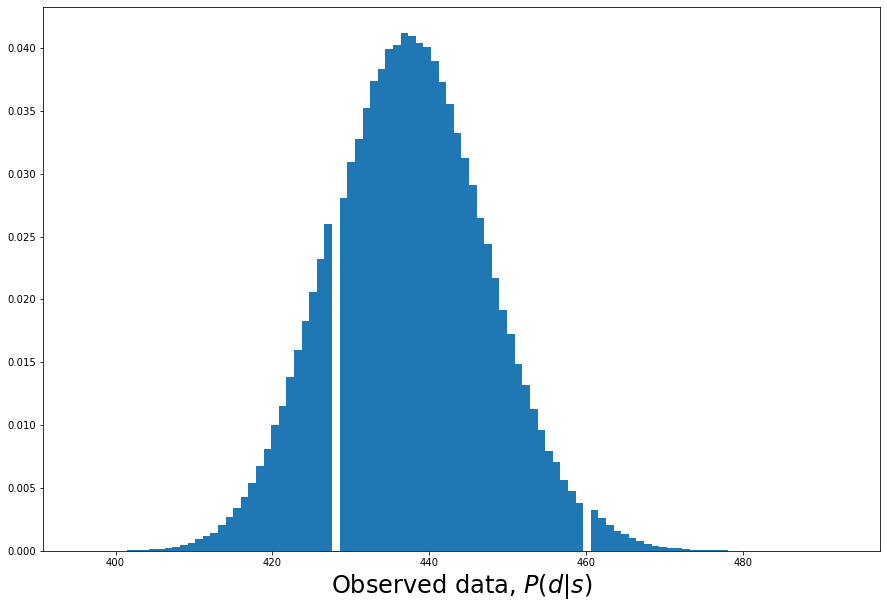

In [5]:
bkgd2 = stats.poisson(100).rvs(size=500000)
inject2 = np.full(500000, twentytwo_sig)
obs_data = bkgd2 + inject2 #np.concatenate((bkgd2, inject2), axis=0)
plt.hist(obs_data, bins=100, density=True)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

The observed signal appears to be very bright and concentrated around the signal range from 400-489, peaking just before 440. This shape seems like a steep symmetric distribution. This histogram is telling me that the observed data is mostly concentrated within this range. This observed signal is definitely biased, as our true signal injection is at 22sigma, but the observed data displays this injection farther along the probability axis at 400.

## Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

b) For the same injected signal power as in problem 2, show that you get the same answer.

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

d) For your observed signal, what is the 1σ uncertainty on the true signal strength?

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

In [6]:
sig_size = 1000000
signal = np.random.uniform(0, thirty_sig, size=sig_size)
#inject = np.full(10000, twentytwo_sig)
#signal = np.concatenate((signal, inject), axis=0)
len(signal)

1000000

In [7]:
data = bkgd + signal

#signaledges = np.linspace(eight_sig,thirty_sig,40)
#dataedges = np.linspace(-1*eight_sig,thirty_sig+30,68)

#Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

#Psd: ndarray, shape(nx, ny)
#The bi-dimensional histogram of samples x and y. Values in x are histogrammed along the first dimension and values in y are histogrammed along the second dimension.
#temp, shape(nx+1,)
#The bin edges along the first dimension.
#temp2, shape(ny+1,)
#The bin edges along the second dimension.

#datacenters = (dataedges[:-1] + dataedges[1:]) / 2
#signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
#plt.pcolormesh(datacenters,signalcenters,Psd.T)
#plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
#plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Text(0.5, 0, 'Observed data, $P(d|s)$')

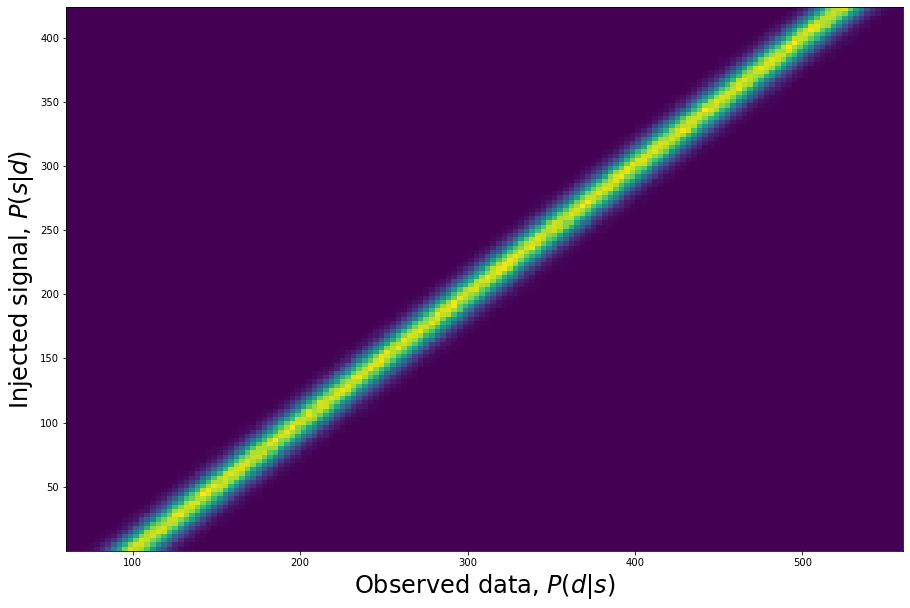

In [8]:
H = plt.hist2d(data, signal, bins=[150, 130], density = True)
plt.ylabel('Injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

I am simulating the spread of signals over the poisson background with a mean of 100, with a clear injection of signals at 22 sigma.

In [9]:
hist2darray = H[0] 
dataedges = H[1]
signaledges = H[2]

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

In [10]:
def obs_slice(sgn):
    #fixed signal, displays observed data P(d|s)
    #dc = np.asarray(datacenters)
    idx = (np.abs(signalcenters - sgn)).argmin()
    flux = hist2darray.T[idx]
    
    plt.title(f'signal = {sgn}', fontsize=24)
    plt.xlabel(f'Observed data P(d|s)', fontsize=24)
    plt.x
    plot = plt.step(datacenters, flux, label='Observed data: P(d|s)')
    return plot

In [11]:
def sgn_slice(data):
    #fixed signal, displays observed data P(d|s)
    idx = (np.abs(datacenters - data)).argmin() #finds index of nearest signal center
    flux = hist2darray[idx]
    
    plt.title(f'observed data = {data}', fontsize=24)
    plt.xlabel(f'True Signal P(s|d)', fontsize=24)
    plot = plt.step(signalcenters, flux, label='True signal P(s|d)')
    return plot

In [12]:
def both_slice(val):
    #fig, ax = plt.subplots(1,1)
    obs_slice(val)
    sgn_slice(val)
    plt.title(f'value = {val}', fontsize=24)
    plt.xlabel('P', fontsize=24)
    plt.legend(prop={'size': 18})

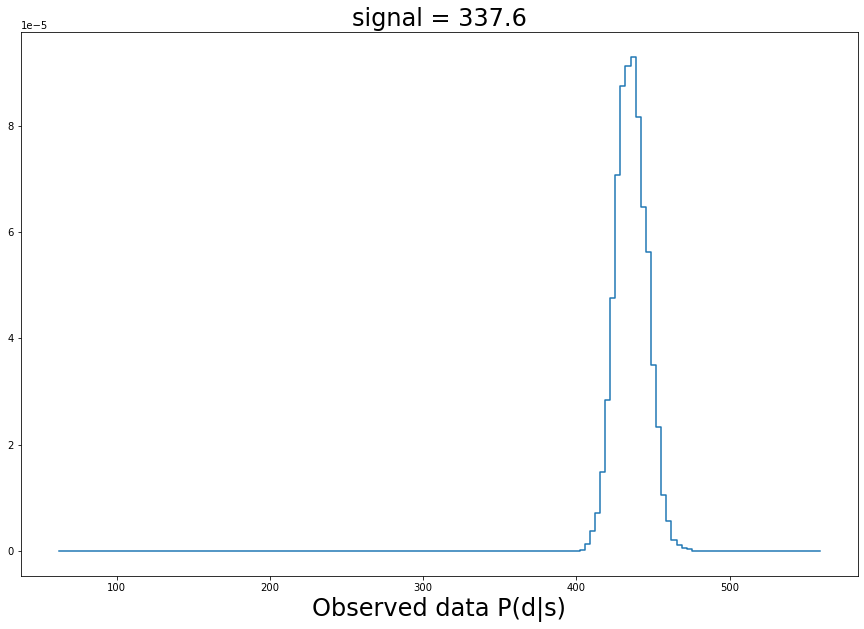

In [13]:
obs_slice(twentytwo_sig) #P(d|s) at injected signal

This yields a similar histogram as seen in Problem 2.

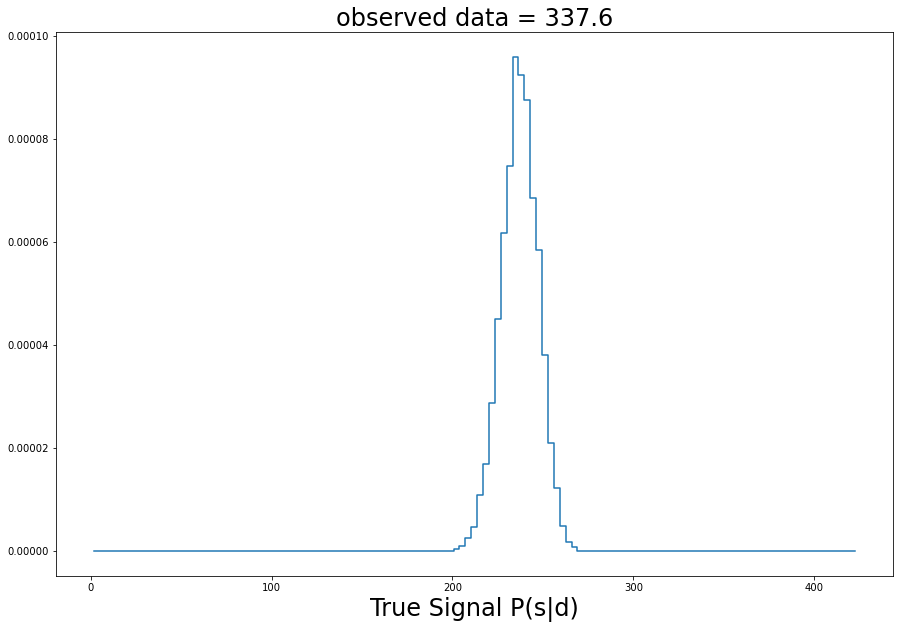

In [14]:
sgn_slice(twentytwo_sig)

This histogram shows a weaker bias than its counterpart at 22sigma. Instead of being shifted by the mean of the background to the right by one hundred, it is now shifted to the left, such that the true signal at an observed reading of 22sigma is found with a true signal of around 237.6, give or take.

The 1sigma uncertainty at this true signal should be equal to about 10.6, which is the 1sigma found from dividing the 5sigma threshold by 5.

The uncertainty should be symmetric, as the true signal distribution is not skewed, which makes sense that the 1sigma uncertainty of this true signal should be +-10.6.